# **Driver Awarness Project**





**Step 1:**
1. Installation of kaggle 
2. Copying of Kaggle.json into kaggle




In [1]:
!pip install -q kaggle

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

# This permissions change avoids a warning on Kaggle tool startup.
!chmod 600 ~/.kaggle/kaggle.json

**Step** **2:** 
 Making connection with kaggle to import our dataset to project

In [2]:
!kaggle datasets download -d kutaykutlu/drowsiness-detection

drowsiness-detection.zip: Skipping, found more recently modified local copy (use --force to force download)


**Step 3:** Importing of our Libararies :
1.   Import keras model (Sequential)
2.   Import keras Layers (Dense,Conv2D,Dropout,MaxPooling2D,Flatten)
3.   Import matplotlib to plot our carves
4.   Import numpy to make our calculations on our arrays and metrices
5.   Import IPython.display to play buzzer sound when driver sleeped
6.   Import opencv library cv2 to preprocessing our photo of driver
7.   Import zipfile to extract our dataset












In [3]:
import keras 
from keras.preprocessing import image
from keras.models import * 
from keras.layers import * 
import PIL
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import np_utils
from keras import backend as K
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.image import imread
from keras.models import Sequential
from keras.layers import Dense,Conv2D,Dropout,MaxPooling2D,Flatten
from zipfile import ZipFile 
import cv2
import os
import numpy as np
from PIL import Image
from IPython.display import Audio
from scipy.io import wavfile

**Step 4:**
Extracting our dataset

In [4]:
file_name='/content/drowsiness-detection.zip'
with ZipFile(file_name,'r') as zip:
  zip.extractall()

**Step 5:**
Calling of buzzer sound (test.wav) from python pacakages

In [5]:
!cp /usr/local/lib/python3.7/dist-packages/IPython/lib/tests/test.wav .

**Step 6:** Making an object from audio function

In [6]:
sound = Audio('test.wav')

**Step 7:** Making train and test data generation from ImageDataGenerator with validation spliting and rescale train and test data (Normalization)

In [7]:
train_datagen = ImageDataGenerator( 
        validation_split=0.3,
        rescale=1./255.,
        horizontal_flip=True)

test_datagen = ImageDataGenerator(validation_split=0.3,rescale=1./255.)

**Step 8:** Devolping train and test data :
1.   Read from directory of our dataset
2.   Set color mode 
3. Set batch and target size (Dimensions of photos)
4. Set class mode (binary)




In [8]:
training_set = train_datagen.flow_from_directory(
        r'/content/drowsiness-detection',
        color_mode = 'rgb',
        target_size=(224,224),
        batch_size=100,
        class_mode='binary', shuffle=True)

test_set = test_datagen.flow_from_directory(
        r'/content/drowsiness-detection',
        color_mode = 'rgb',
        target_size=(224,224),
        batch_size=100,
        class_mode='binary', shuffle=True)


Found 48000 images belonging to 2 classes.
Found 48000 images belonging to 2 classes.


**Step 9:** Buliding our model
1.   Set our model (sequential).
2.   Add convulotion 2D layer with **input_shape** ***(for first time only)*** .
3. Add activation function (relu) to make negative feature values = zero.
4. Add Max Pooling for select maximum feature from feature map.
5. Add Flatten to convert features to vector to allow it to fully connected layers.
6. Add output layer with activation layer(sigmoid).



In [9]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(224,224,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(1))
model.add(Activation('sigmoid'))

**Step 10:** Compile our model with :
1.   Set optimizer
2.   Set metrics (accuarcy)



In [10]:
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

**Step 11:** Check our calsses alocated numbers alocate :

In [11]:
print(training_set.class_indices)

{'closed_eye': 0, 'open_eye': 1}


**Step 12:** Make Summary of our model :

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 32)      896       
_________________________________________________________________
activation (Activation)      (None, 222, 222, 32)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 109, 109, 64)      18496     
_________________________________________________________________
activation_1 (Activation)    (None, 109, 109, 64)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 186624)            0

**Step 13:** Making train of our model
1. Import training set
2. Make epochs = 20 to detect all samples
3. Import validation data
4. Make batch_size = 100 and validation step = 1

In [13]:
results=model.fit( 
    training_set,
    batch_size=100,  
    epochs=20,
    validation_data=test_set,
    validation_steps=1
)

Epoch 1/20
480/480 [==============================] - 134s 213ms/step - loss: 0.3842 - accuracy: 0.8544 - val_loss: 0.1471 - val_accuracy: 0.9500
Epoch 2/20
480/480 [==============================] - 103s 214ms/step - loss: 0.1572 - accuracy: 0.9447 - val_loss: 0.1846 - val_accuracy: 0.9500
Epoch 3/20
480/480 [==============================] - 103s 214ms/step - loss: 0.1237 - accuracy: 0.9612 - val_loss: 0.0534 - val_accuracy: 0.9800
Epoch 4/20
480/480 [==============================] - 103s 214ms/step - loss: 0.0982 - accuracy: 0.9667 - val_loss: 0.0327 - val_accuracy: 0.9800
Epoch 5/20
480/480 [==============================] - 103s 214ms/step - loss: 0.0876 - accuracy: 0.9707 - val_loss: 0.1247 - val_accuracy: 0.9500
Epoch 6/20
480/480 [==============================] - 103s 214ms/step - loss: 0.0817 - accuracy: 0.9741 - val_loss: 0.0573 - val_accuracy: 0.9700
Epoch 7/20
480/480 [==============================] - 103s 214ms/step - loss: 0.0735 - accuracy: 0.9769 - val_loss: 0.0276 -

**Step 14:** Saving our model :

In [14]:
model.save("eyes1.h5")

**Step 15:** Plot Training and Validation losses :

(0.0, 1.0)

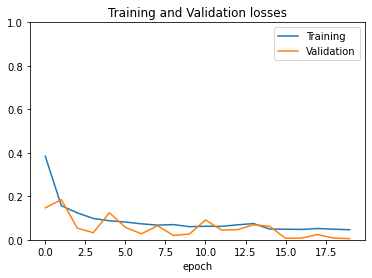

In [15]:
plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])
plt.legend(['Training', 'Validation'])
plt.title('Training and Validation losses')
plt.xlabel('epoch')
plt.ylim(0, 1)


**Step 16:** Training and Validation accuracy :

(0.0, 1.0)

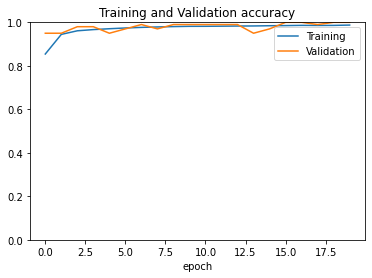

In [16]:
plt.plot(results.history['accuracy'])
plt.plot(results.history['val_accuracy'])
plt.legend(['Training', 'Validation'])
plt.title('Training and Validation accuracy')
plt.xlabel('epoch')
plt.ylim(0, 1)


**Step 17:** Import Camera Library

In [17]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='image.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename


**Step 18:** Activate Webcam and Take picture

In [ ]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

**Step 19:** Prediction of Image :

In [26]:
img = cv2.imread('/content/detect_closed_eyes.jpg')
#img = cv2.imread('/content/detect_closed_sunglasses.jpg')
#img = cv2.imread('/content/detect_open_eyes.jpg')
#img = cv2.imread('/content/detect_open_sunglasses.jpg')

img = cv2.resize(img,(224,224))
img = np.reshape(img,[1,224,224,3])

prediction=model.predict(img/255.0) 
if prediction[0] > 0.5 :
 print(prediction[0])
 print("Open eyes")
else :
 print(prediction[0])
 print("Closed eyes")
 sound

[0.03985627]
Closed eyes
